In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Warm-up (4 points)

## 1.1 Creating Matrices (0.25 points)

Create 4 matrices
- A - a "checkerboard" matrix of zeros and ones, size 6x3, with the top-left value (A[0][0]) equal to 1,
- В - a matrix of numbers from 1 to 24, arranged in a snake-like pattern, size 6x4,
- C - a matrix of random integers from 2 to 10 (inclusive), size 4x3,
- D - a matrix of zeros with ones on the main diagonal, size 4x4.

**Create a “patchwork” matrix S from these matrices**

A В

С D

using **only standard** numpy operations. Do not use Comprehensions.

Then, append matrix **F** of size 10x2 filled with zeros to the resulting matrix **S** to create matrix **G**:

S F

Note: When we say a matrix has a size of x by y, x is the number of rows, and y is the number of columns.

In [ ]:
A = np.zeros((6, 3), dtype=int)
A[::2, ::2] = 1  
A[1::2, 1::2] = 1

B = np.arange(1, 25).reshape(6, 4)
B[1::2] = B[1::2, ::-1]  

C = np.random.randint(2, 11, size=(4, 3))

D = np.eye(4, dtype=int)

top = np.hstack((A, B))
bottom = np.hstack((C, D))
S = np.vstack((top, bottom))

F = np.zeros((10, 2), dtype=int)
G = np.hstack((S, F))

print("Matrix A:\n", A)
print("Matrix B:\n", B)
print("Matrix C:\n", C)
print("Matrix D:\n", D)
print("Matrix S:\n", S)
print("Matrix G:\n", G)


Matrix A:
 [[1 0 1]
 [0 1 0]
 [1 0 1]
 [0 1 0]
 [1 0 1]
 [0 1 0]]
Matrix B:
 [[ 1  2  3  4]
 [ 8  7  6  5]
 [ 9 10 11 12]
 [16 15 14 13]
 [17 18 19 20]
 [24 23 22 21]]
Matrix C:
 [[ 2  6  2]
 [ 9  7  7]
 [ 3  2  9]
 [10  3  2]]
Matrix D:
 [[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]
Matrix S:
 [[ 1  0  1  1  2  3  4]
 [ 0  1  0  8  7  6  5]
 [ 1  0  1  9 10 11 12]
 [ 0  1  0 16 15 14 13]
 [ 1  0  1 17 18 19 20]
 [ 0  1  0 24 23 22 21]
 [ 2  6  2  1  0  0  0]
 [ 9  7  7  0  1  0  0]
 [ 3  2  9  0  0  1  0]
 [10  3  2  0  0  0  1]]
Matrix G:
 [[ 1  0  1  1  2  3  4  0  0]
 [ 0  1  0  8  7  6  5  0  0]
 [ 1  0  1  9 10 11 12  0  0]
 [ 0  1  0 16 15 14 13  0  0]
 [ 1  0  1 17 18 19 20  0  0]
 [ 0  1  0 24 23 22 21  0  0]
 [ 2  6  2  1  0  0  0  0  0]
 [ 9  7  7  0  1  0  0  0  0]
 [ 3  2  9  0  0  1  0  0  0]
 [10  3  2  0  0  0  1  0  0]]


## 1.2 Finding the Nearest Neighbor (0.25 points)

Implement a function that takes a matrix **X** and a number **a** and returns the element in the matrix closest to the given number.
   
For example, for **X = np.arange(0, 10).reshape((2, 5))** and **a = 3.6**, the answer will be 4. You can only use basic numpy functions, **do not use loops**.

In [ ]:
def find_nearest_neighbour(X, a):
    return X.flat[np.abs(X - a).argmin()]

X = np.arange(0, 10).reshape((2, 5))
a = 3.6
print(find_nearest_neighbour(X, a))  

4


## 1.3 Very Strange Neural Network (0.25 points)

Implement a strange neural network. The network should:

- Square matrix **A** (the weight matrix) of size N x N.
- In the first transformation, multiply a vector **X** of length N (feature vector) by the weight matrix **A^2** (the output will be a new vector).
- In the second transformation, multiply the resulting vector by vector **b** (weight vector) of size N to produce a scalar value.

Assume that all elements in matrices and vectors are floating-point numbers.

In [144]:
def very_strange_neural_network(A, b, X):
    return np.dot(b, np.dot(A @ A, X))

A = np.random.rand(4, 4)
b = np.random.rand(4)
X = np.random.rand(4)
print(very_strange_neural_network(A, b, X))


2.043401522227725


## 1.4 The Jungle Calls! (0.25 points)

You are given a matrix **M**, a map of an impassable jungle terrain created by Lara Croft. Each cell in the map is an integer representing the height above sea level (if positive) in meters or the sea depth (if negative) in meters in a one-meter-by-one-meter area of the map. If the number is 0, it represents land - a shoreline.

You need to calculate:
- The total area of cells in the sea where the depth is greater than 5 (in m^2).
- The total volume of water on the map (in m^3).
- The maximum height above sea level on this map (in m).

In [105]:
def find_deep_sea_area(M):
    return np.sum(M < -5)

def find_water_volume(M):
    return np.abs(M[M < 0]).sum()

def find_max_height(M):
    return M.max()


In [ ]:
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])

assert np.isclose(find_deep_sea_area(M), 1)
assert np.isclose(find_water_volume(M), 21)
assert np.isclose(find_max_height(M), 25)

print("Total sea area on the map -", find_deep_sea_area(M), "м^2")
print("Total water volume on the map -", find_water_volume(M), "м^3")
print("Maximum elevation on the map -", find_max_height(M), "м")

Total sea area on the map - 1 м^2
Total water volume on the map - 21 м^3
Maximum elevation on the map - 25 м


## 1.5 Treasure Islands (0.25 points)


The function takes an array **a** of zeros and ones as input. Count the number of consecutive blocks of ones (islands) in the array. Only basic numpy functions are allowed, **no loops**.

Hint: check what `np.diff` does.

In [107]:
def count_all_islands(a):
    return np.sum(np.diff(np.concatenate(([0], a, [0]))) == 1)


In [ ]:
a = np.array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

assert count_all_islands(a) == 4
print(count_all_islands(a))

4


## 1.6 Masquerade (0.25 points)

The input is a 2D matrix **X** filled with floating-point numbers and a floating-point number **a**. Replace all cells in the matrix greater than **a** with the average value of the elements in **X**.

**You must** use basic numpy functions, **no loops**.

In [111]:
def swap_mask_for_average(X, a):
    avg = X.mean()
    X = np.where(X > a, avg, X)
    return X


In [ ]:
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])
a = 5

output = swap_mask_for_average(M, a)

expected_output = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 2.875],  
    [-2, 0, 4, 2.875],    
    [-1, 3, 2.875, 2.875] 
])

assert np.allclose(output, expected_output, atol=1e-4), f"Output: {output}"

print("Result is correct:", output)

Result is correct: [[-7.    -3.    -1.     0.   ]
 [-4.    -3.     1.     2.875]
 [-2.     0.     4.     2.875]
 [-1.     3.     2.875  2.875]]


## 1.7 Hot on the Trails (0.25 points)

The input is a square matrix **M**. Calculate the difference between the sum along the main diagonal and the secondary diagonal.

Only basic numpy functions are allowed, **no loops**.

Hint: look up `np.trace`.

In [116]:
def count_trace_diff(M):
    return np.trace(M) - np.trace(np.flip(M, axis=1))

In [ ]:
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])

assert np.allclose(count_trace_diff(M), 3)

count_trace_diff(M)

np.int64(3)

## 1.8 King of the Hill (0.25 points)

The input is a vector a of size N. Using addition, concatenation, and broadcasting, create a symmetric matrix of size 2N x 2N with the maximum value in the center and decreasing values toward the edges.

Example: a = (0, 1, 2)

Result:

0 1 2 2 1 0 \\
1 2 3 3 2 1 \\
2 3 4 4 3 2 \\
2 3 4 4 3 2 \\
1 2 3 3 2 1 \\
0 1 2 2 1 0 \\

In [118]:
def create_mountain(a):
    size = 2 * len(a)
    grid = np.abs(np.arange(size) - len(a) + 1)
    return grid + grid[:, None]

In [ ]:
a = np.array([0, 1, 2, 3, 4])

create_mountain(a)

array([[ 8,  7,  6,  5,  4,  5,  6,  7,  8,  9],
       [ 7,  6,  5,  4,  3,  4,  5,  6,  7,  8],
       [ 6,  5,  4,  3,  2,  3,  4,  5,  6,  7],
       [ 5,  4,  3,  2,  1,  2,  3,  4,  5,  6],
       [ 4,  3,  2,  1,  0,  1,  2,  3,  4,  5],
       [ 5,  4,  3,  2,  1,  2,  3,  4,  5,  6],
       [ 6,  5,  4,  3,  2,  3,  4,  5,  6,  7],
       [ 7,  6,  5,  4,  3,  4,  5,  6,  7,  8],
       [ 8,  7,  6,  5,  4,  5,  6,  7,  8,  9],
       [ 9,  8,  7,  6,  5,  6,  7,  8,  9, 10]])

## 1.9 Monochrome Photograph 9x12 (0.5 points)

The input is a 2D matrix **P** of size N x M filled with numbers from 0 to 255, representing a grayscale photograph, and a natural number **C**. You need to produce a matrix of size (N - C + 1) x (M - C + 1), where each cell is the average value of the corresponding sub-matrix of size **C x C**. Essentially, this will apply a simple blur effect (slightly reducing its size).

In [120]:
def custom_blur(P, C):
    kernel = np.ones((C, C)) / (C * C)
    result = np.lib.stride_tricks.sliding_window_view(P, (C, C))
    return np.tensordot(result, kernel, axes=((2, 3), (0, 1)))

In [ ]:
P = np.arange(0, 12).reshape((3, 4))
kernel = 2

assert np.allclose(custom_blur(P, kernel),
                   np.array([[2.5, 3.5, 4.5], [6.5, 7.5, 8.5]]))
custom_blur(P, 2 )

array([[2.5, 3.5, 4.5],
       [6.5, 7.5, 8.5]])

## 1.10 Validation Function (0.75 points)

The input to the function is an arbitrary number (>2) of tuples representing the shapes of different matrices. The function should return True if the matrices can be sequentially added together (possibly using broadcasting), and False otherwise.

In [122]:
def check_successful_broadcast(*matrices):
    shapes = [np.ones(s) for s in matrices]
    try:
        np.broadcast(*shapes)
        return True
    except ValueError:
        return False

In [ ]:
assert check_successful_broadcast((5, 6, 7), (6, 7), (1, 7))

## 1.11 Pairwise Distances (0.75 points)

The input is matrices A of size m x k and B of size n x k. Create a matrix of size m x n containing pairwise Euclidean distances.

Only use basic functions, do not use loops or third-party libraries. Broadcasting will probably be useful. The solution must be **in one line**, following all code style rules.

In [124]:
def pairwise_distances(A, B):
    return np.sqrt(((A[:, None, :] - B[None, :, :]) ** 2).sum(axis=-1))

In [125]:
A = np.random.rand(3, 2)
B = np.random.rand(4, 2)
print(pairwise_distances(A, B))

[[0.90814406 0.73062887 0.17617753 0.99208979]
 [0.3732115  0.02519718 0.62344277 0.61880521]
 [0.33063084 0.53230766 0.53368201 0.2893621 ]]


Explain the logic behind this one-liner. What exactly is happening?

<font color='red'> YOUR ANSWER HERE </font>

# 2. Data Experiment Processing (3 points)

Ladies and gentlemen, now we're going to learn to use libraries for data analysis in real-life scenarios!

**The reason behind this section is simple**: many students in the Faculty of Physics and Mathematics still rely on Excel, calculators, or pen and paper even in their second or third semesters. Our goal is to introduce another method for conducting laboratory work with a much lower entry barrier than Excel itself. We hope this motivates some to explore these handy libraries further.

*Data sponsor for this section - blacksamorez. Without them, five happy semesters of labs would have been far less joyful...*

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##  2.1. Problem Statement and Data

Let's assume we have a gyroscope with a weight attached to its axis on an arm (see the diagram for a quick understanding, and you can find more details in the [laboratory manual](https://lib.mipt.ru/book/267519/), volume 1, p.160). Due to the weight, the gyroscope begins to slowly [precess](https://en.wikipedia.org/wiki/Precession), i.e., it rotates around the vertical axis with a relatively constant frequency.

We'll work through part of this lab, primarily focusing on data processing and plotting graphs.

<center><img src='https://drive.google.com/uc?export=view&id=1KfYQ0hKYRDhi5uk7C8lNffZBNy8NF7nu' width=600>

Diagram of the gyroscope with the attached weight G and arm C</center>

First, let's examine the data someone has kindly gathered for us. Create a dataframe from [this file](https://drive.google.com/file/d/1SbLR6R16obqLewUTnX1CAAjQTrVXh2Vq/view?usp=sharing)

In [ ]:
data = pd.read_csv('data_numpy_lab.csv') 
data.head()

,Unnamed: 0,N,"t, sec","sigma_t, sec","mass, gramm","length, cm","phi, rad"
0,1,4,268,1,180.0,121.0,0.16
1,2,4,264,1,180.0,121.0,0.18
2,3,4,275,1,180.0,121.0,0.16
3,4,4,263,1,180.0,121.0,0.17
4,5,4,267,1,180.0,121.0,0.17


## 2.2 Working with Data

The columns in the dataframe are as follows:

- N: Number of full gyroscope rotations in the experiment;
- t, in seconds: Time of the experiment;
- σ_t: Measurement error in time;
- mass: Mass of the weight attached to the arm on the gyroscope;
- length: Length of the previously mentioned arm;
- phi: Angle in radians by which the arm dropped during the experiment. This will help us estimate the effect of friction in the gyroscope on precession.

Since physicists like to work with properly dimensioned quantities, convert the mass columns to kilograms and length to meters. Then rename all columns to exclude references to units—use only the names of physical quantities.

In [ ]:
data.rename(columns={
    't, sec': 'time',
    'sigma_t, sec': 'sigma_time',
    'mass, gramm': 'mass',
    'length, cm': 'length',
    'phi, rad': 'phi'
}, inplace=True)

if 'Unnamed: 0' in data.columns:
    data.drop(columns=['Unnamed: 0'], inplace=True)

data['mass'] = data['mass'] / 1000  
data['length'] = data['length'] / 100  

data.head()


,N,time,sigma_time,mass,length,phi
0,4,268,1,0.18,1.21,0.16
1,4,264,1,0.18,1.21,0.18
2,4,275,1,0.18,1.21,0.16
3,4,263,1,0.18,1.21,0.17
4,4,267,1,0.18,1.21,0.17


Add new columns to the dataframe with the corresponding names and values, calculated using these formulas:

`omega`: $\Omega = 2 \pi \cdot \frac{N}{t}$

`sigma_omega`: $\sigma_{\Omega} = \Omega / t \cdot \sigma_t$

`omega_down`: $\Omega_{down} = \varphi / t$

`sigma_down`: $\Omega_{down} \cdot \sigma_t / t$

`momentum`: $M = m \cdot g \cdot l$ (`g = 9.8 м/с^2`)

`momentum_down`: $M_{down} = m \cdot \frac{\varphi}{t^2} \cdot l^2$

`sigma_momentum`: $\sigma_{M} = M_{down} \cdot 2 \cdot \frac{\sigma_t}{t}$


In [ ]:
import numpy as np

g = 9.8  

data['omega'] = 2 * np.pi * data['N'] / data['time']  
data['sigma_omega'] = data['omega'] / data['time'] * data['sigma_time'] 

data['omega_down'] = data['phi'] / data['time']  
data['sigma_down'] = data['omega_down'] * data['sigma_time'] / data['time'] 

data['momentum'] = data['mass'] * g * data['length']  # M = m * g * l
data['momentum_down'] = data['mass'] * data['phi'] / (data['time']**2 * data['length']**2)  
data['sigma_momentum'] = data['momentum_down'] * 2 * data['sigma_time'] / data['time'] 

data.head()


,N,time,sigma_time,mass,length,phi,omega,sigma_omega,omega_down,sigma_down,momentum,momentum_down,sigma_momentum
0,4,268,1,0.18,1.21,0.16,0.093779,0.000350,0.000597,0.000002,2.13444,2.738749e-07,2.043842e-09
1,4,264,1,0.18,1.21,0.18,0.095200,0.000361,0.000682,0.000003,2.13444,3.175166e-07,2.405429e-09
2,4,275,1,0.18,1.21,0.16,0.091392,0.000332,0.000582,0.000002,2.13444,2.601096e-07,1.891706e-09
3,4,263,1,0.18,1.21,0.17,0.095562,0.000363,0.000646,0.000002,2.13444,3.021615e-07,2.297806e-09
4,4,267,1,0.18,1.21,0.17,0.094130,0.000353,0.000637,0.000002,2.13444,2.931758e-07,2.196074e-09


You may have already wondered why the experiments with the same mass are repeated so many times. To achieve more stable results, of course! Now calculate the average values of the columns `omega`, `σ_omega`, `momentum`, and `momentum_down` for each unique mass.


**Hint:** The groupby function will help you here. No loops allowed!

In [ ]:
grouped_data = data.groupby('mass')[['omega', 'sigma_omega', 'momentum', 'momentum_down']].mean()

assert 0.273 in grouped_data.index
assert np.allclose(grouped_data.omega[0.273], 0.1433)

grouped_data

,omega,sigma_omega,momentum,momentum_down
mass,,,,
0.142,0.066661,0.000236,1.683836,1.916815e-07
0.180,0.094012,0.000352,2.134440,2.893677e-07
0.216,0.081687,0.000354,2.286144,5.700320e-07
0.273,0.143300,0.000817,3.263988,9.779681e-07
0.341,0.150752,0.000723,3.675980,1.077390e-06
0.614,0.185194,0.000910,6.679092,1.996611e-06


## 2.3 Simple Graphs and Least Squares Method (LSM)

It's now time to reintroduce the Least Squares Method (LSM). Of course, we won't make you write LSM yourself! <s>We're not that cruel</s>

In NumPy, the function [np.polyfit](https://numpy.org/devdocs/reference/generated/numpy.polyfit.html) calculates a polynomial of a given degree that best fits `y(x)` using LSM for the provided `x`, `y`, and degree `p`.

The function [np.polyval](https://numpy.org/devdocs/reference/generated/numpy.polyval.html) evaluates the polynomial `P(x)` with given coefficients.

Your task is to plot the dependence $\Omega (M)$ (angular velocity on moment of inertia). The graph should include experimental points and a line fitted using the least squares method. In the legend, include the polynomial with the calculated coefficients. Don't forget to label the axes (font size 14), add a grid, and provide a suitable title (font size 18)!

<center><img src='https://drive.google.com/uc?export=view&id=1xumON0195iA4HGSqvpS0FAhPGxuCdKH8' width=600>

Example of the resulting graph</center>

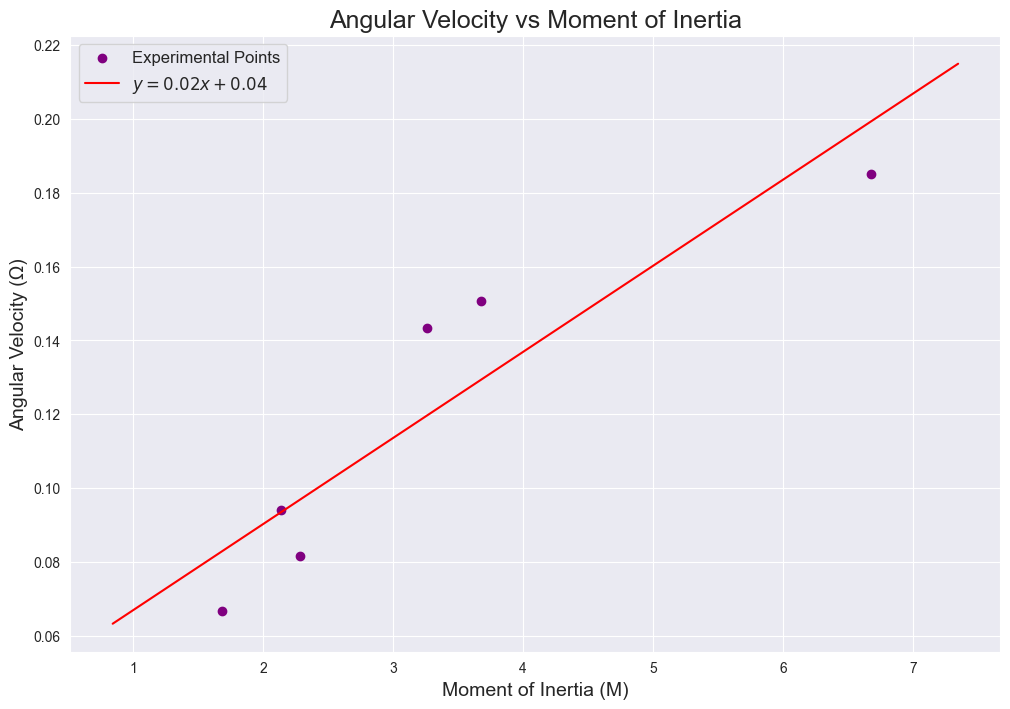

In [ ]:
omega_np = np.array(grouped_data.omega)
momentum_np = np.array(grouped_data.momentum)

coefs, cov_matrix = np.polyfit(momentum_np, omega_np, deg=1, cov=True)  
slope, intercept = coefs

errors = np.sqrt(np.diag(cov_matrix))
slope_err, intercept_err = errors

x_lsq = np.linspace(momentum_np.min() * 0.5, momentum_np.max() * 1.1, 100)
y_lsq = np.polyval(coefs, x_lsq)

fig = plt.figure(figsize=(12, 8))
plt.scatter(momentum_np, omega_np, color='purple', label='Experimental Points')

plt.plot(x_lsq, y_lsq, color='red', label=fr'$y = {slope:.2f}x + {intercept:.2f}$')

plt.title('Angular Velocity vs Moment of Inertia', fontsize=18)
plt.xlabel('Moment of Inertia (M)', fontsize=14)
plt.ylabel('Angular Velocity (Ω)', fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)

plt.show()

`np.polyfit` also estimates errors! Specifically, it returns the covariance matrix for the least squares method. Without delving into the math, all you need to know is that the diagonal elements are the variances of the calculated coefficients. To get the actual error $\sigma$, take the square root of these variances.

Also, note the `W` parameter, which sets point weights for the estimate. If $y_{error}$ values are known, you can set weights as $W = 1 / y_{error}$ to get an even more precise line. To account for $x$ errors as well, you'd need other methods (but $y$ errors alone are likely sufficient).

Suppose there's been a mishap, and the errors have increased tenfold!

In [132]:
grouped_data['sigma_down'] *= 10
grouped_data['sigma_momentum'] *= 10

KeyError: 'sigma_down'

Now, you need to plot the dependence $\Omega_{down} (M_{down})$ <b>(not $\Omega(M)$!)</b> for points with error bars. In addition to plotting the line from the least squares estimate, include the error estimates for the coefficients. So, plot three lines: $k \cdot x + b$ from the LSM, $(k - \sigma_k) \cdot x + (b - \sigma_b)$, and $(k + \sigma_k) \cdot x + (b + \sigma_b)$, filling the area between these lines with shading (use `plt.fill_between` for this). Keep the rest of the styling as in the previous task.

_Note: Often in LSM, only the error for `k` is considered, leaving out `σ_b`._

<center><img src='https://drive.google.com/uc?export=view&id=1SriaMzJah7F610ocIK_O1-HqqtMQgxlg' width=600>

Example of the resulting graph</center>

AttributeError: 'DataFrame' object has no attribute 'omega_down'

# 3. Working with the Dataset (3 points)

The Iris dataset was used in R.A. Fisher's 1936 paper “The Use of Multiple Measurements in Taxonomic Problems” and is now commonly used by beginner data analysts.

The dataset includes three species of iris flowers, with 50 samples for each species, along with several properties of each flower. One species is linearly separable from the other two, but the latter two are not linearly separable from each other.

The columns in this dataset:

Identifier (Id) \\
Sepal length in cm (SepalLengthCm) \\
Sepal width in cm (SepalWidthCm) \\
Petal length in cm (PetalLengthCm) \\
Petal width in cm (PetalWidthCm) \\
Species (Species) \\

<font color='red'>Attention!</font> All plots in this part should be labeled!

In [134]:
sns.set_style("darkgrid")

In [ ]:
iris = pd.read_csv("iris.csv")  

iris.head()

,ID,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris = iris.drop(columns=['ID'])

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Let's check how many different iris species we have—there should be three, with 50 samples each. Use `value_counts` to see the possible values in the species column.

In [ ]:
species_counts = iris['species'].value_counts()

print(species_counts)


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


## 3.1 Petal Length and Width Plots

Let's examine whether petal width and length are related—use `sns.scatterplot` to display the OXY values. Remember to label the plot and the axes!

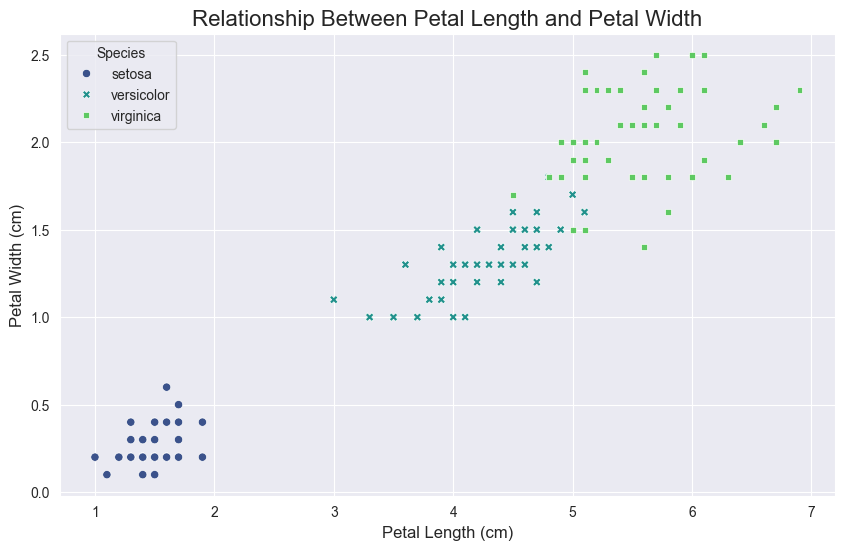

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=iris, x="petal_length", y="petal_width", hue="species", style="species", palette="viridis")

plt.title("Relationship Between Petal Length and Petal Width", fontsize=16)
plt.xlabel("Petal Length (cm)", fontsize=12)
plt.ylabel("Petal Width (cm)", fontsize=12)

plt.legend(title="Species", fontsize=10)

plt.show()

What conclusions can you draw from the scatter plot? What is missing from the plot to make it more informative?

Conclusions:
Petal length and width are strongly positively correlated—longer petals are usually wider.
Iris-setosa is clearly separate from the other two species, while Iris-versicolor and Iris-virginica overlap.
What's Missing:
Adding regression lines would show trends for each species.
Showing distributions (like histograms or KDEs) would make the plot more informative.


Let's try other plot types for the same purpose from the seaborn library—`sns.jointplot`, and also try to color the points based on iris species using `sns.facetgrid`. Display these two plots in the following cells and analyze them.

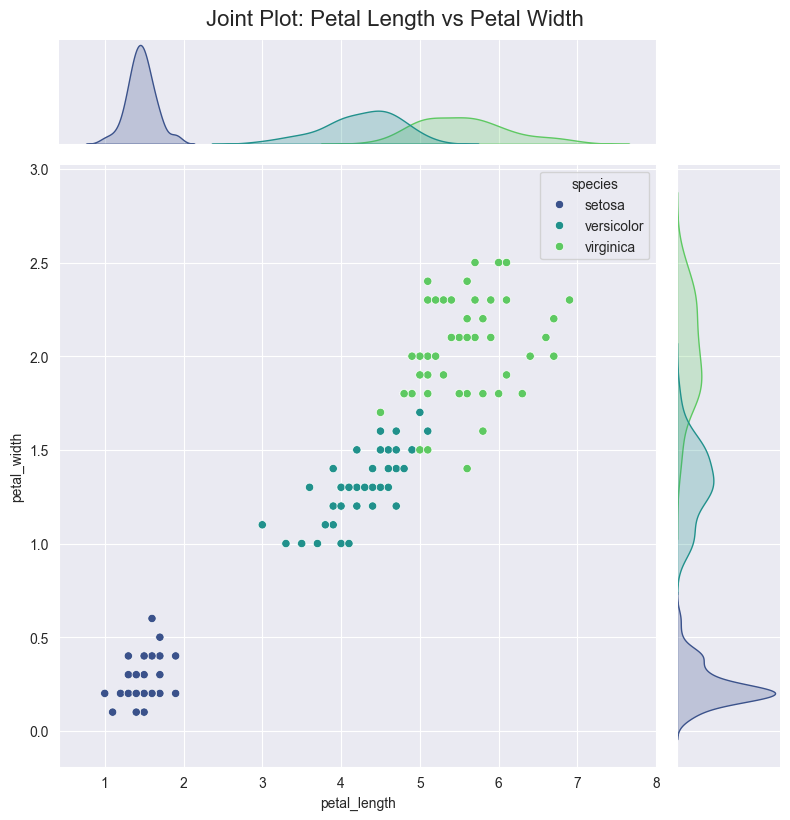

In [ ]:
sns.jointplot(
    data=iris,
    x="petal_length",
    y="petal_width",
    hue="species",
    kind="scatter",  
    palette="viridis",
    height=8
).fig.suptitle("Joint Plot: Petal Length vs Petal Width", y=1.02, fontsize=16)

plt.show()

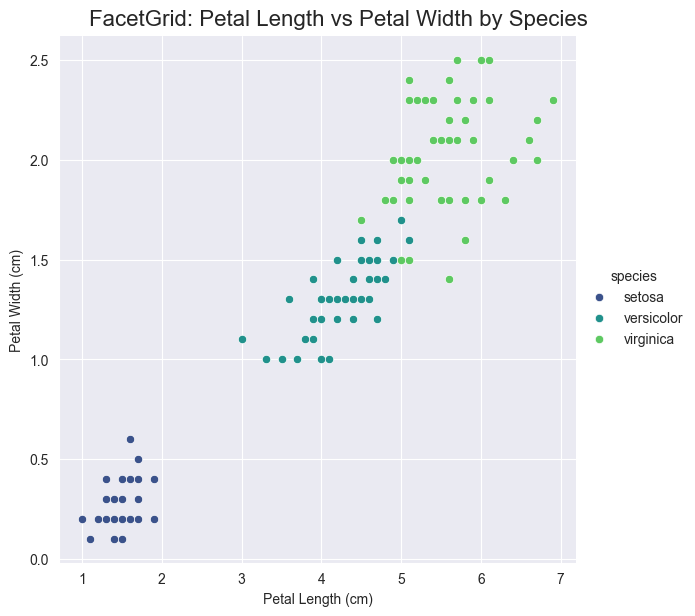

In [ ]:
g = sns.FacetGrid(iris, hue="species", palette="viridis", height=6)
g.map(sns.scatterplot, "petal_length", "petal_width")
g.add_legend(title="species")

g.fig.suptitle("FacetGrid: Petal Length vs Petal Width by Species", y=1.02, fontsize=16)
g.set_axis_labels("Petal Length (cm)", "Petal Width (cm)")

plt.show()


What conclusions can you draw from these plots? Which of the three methods — scatterplot, jointplot, or facetgrid seems the best to you?

<font color='red'> YOUR ANSWER HERE </font>

### Comparison:
- **Joint Plot**: More informative because it shows both the scatter plot and the feature distributions. It’s compact and visually rich.  
- **FacetGrid**: Easier to compare species individually but less compact and harder to compare all species at once.

### Information:
- Petal length and width are strongly correlated.
- Iris-setosa is clearly separate, while Iris-versicolor and Iris-virginica overlap.  
- The joint plot gives more overall context, while FacetGrid is better for species-specific trends.  

I prefer the joint plot because it’s more visually appealing and combines everything in one view.

## 3.2 Distribution Plots of Petal Length Values

Plot a “box-and-whisker plot” with `sns.boxplot` and its counterpart with `sns.violinplot`. The x-axis should represent the iris species, and the y-axis should represent petal length.

C:\Users\User\AppData\Local\Temp\ipykernel_32748\3394320655.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=iris, x="species", y="petal_length", palette="viridis")


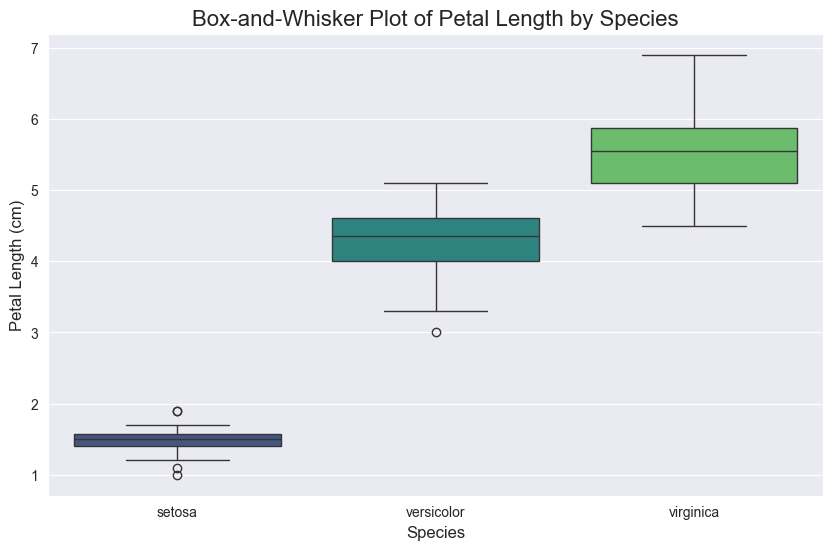

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris, x="species", y="petal_length", palette="viridis")

plt.title("Box-and-Whisker Plot of Petal Length by Species", fontsize=16)
plt.xlabel("Species", fontsize=12)
plt.ylabel("Petal Length (cm)", fontsize=12)

plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_32748\616115044.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=iris, x="species", y="petal_length", palette="viridis")


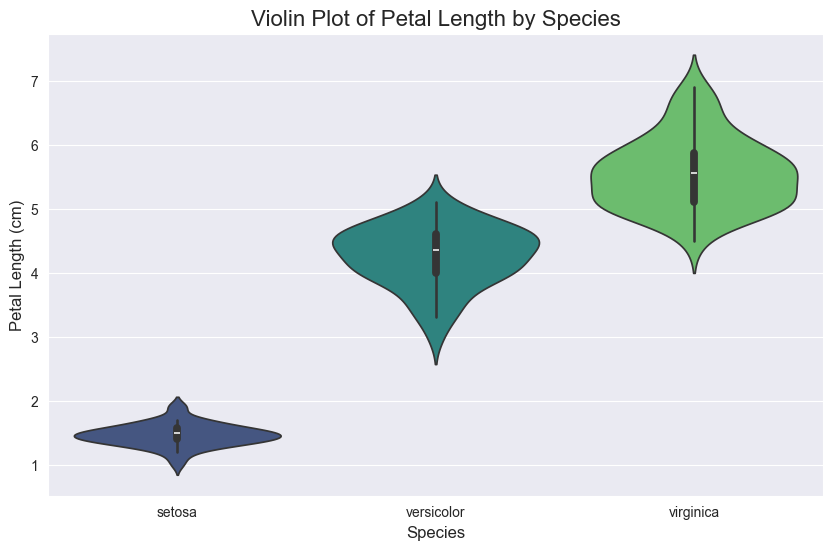

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=iris, x="species", y="petal_length", palette="viridis")

plt.title("Violin Plot of Petal Length by Species", fontsize=16)
plt.xlabel("Species", fontsize=12)
plt.ylabel("Petal Length (cm)", fontsize=12)

plt.show()


Compare the two types of plots. Which one is more informative, and which is more visually appealing in your opinion? What information can we gather from these plots?

<font color='red'> YOUR ANSWER HERE </font>

### Comparison:
- **Boxplot**:
  - More **informative** for quickly seeing the median, quartiles, and potential outliers.
  - Shows basic distribution, but doesn't give much insight into the overall shape of the data.

- **Violin Plot**:
  - More **visually appealing** because it combines a boxplot with a smooth density curve, making it easier to understand the distribution.
  - Gives a better sense of the data's shape and any potential skewness or multiple modes.

### Information:
- Both plots show how **petal length** varies across **species**.
- The **boxplot** highlights summary statistics, while the **violin plot** provides more detailed information about the distribution's shape. 

In my opinion, the **violin plot** is more visually appealing and gives richer insights into the data.

## 3.3 Pairwise Feature Comparison Plots


Let's create a 4x4 grid of plots where all possible pairs of features (petal length/width, sepal length/width) are displayed. Use `sns.pairplot`, and don't forget to specify the `hue` parameter.

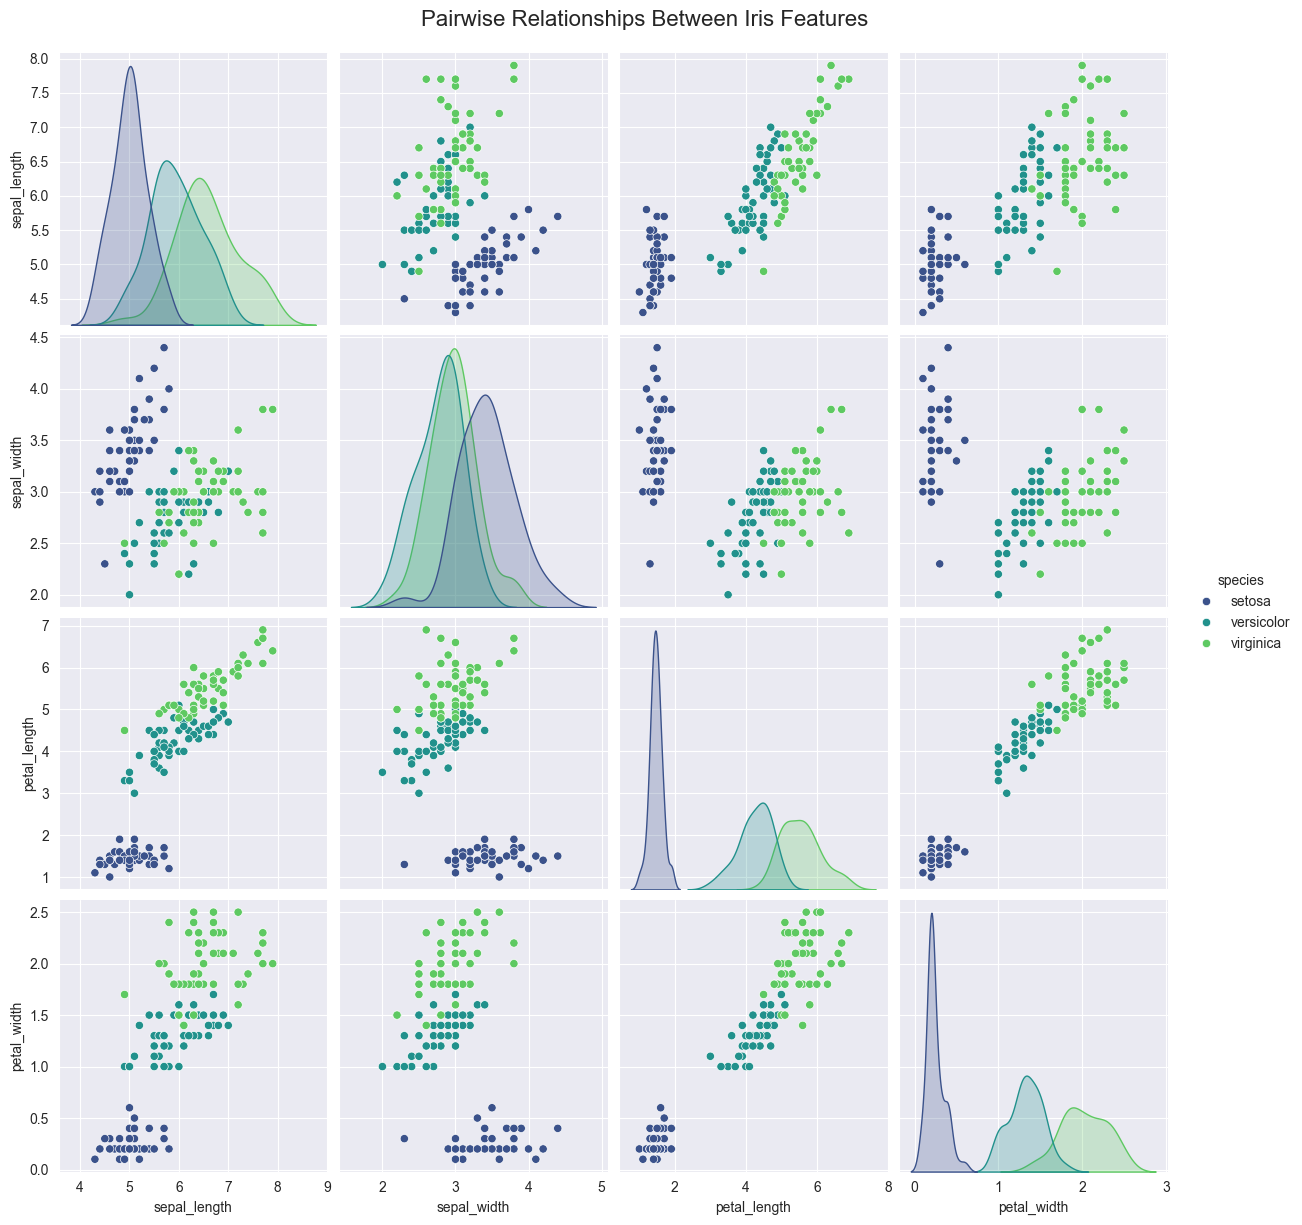

In [ ]:
sns.pairplot(iris, hue="species", diag_kind="kde", palette="viridis", height=3)

plt.suptitle("Pairwise Relationships Between Iris Features", y=1.02, fontsize=16)

plt.show()


What information can you gather about the feature relationships from this plot?

<font color='red'> YOUR ANSWER HERE </font>

Feature Relationships:
Petal length and width are strongly positively correlated—longer petals tend to be wider.
Sepal length and width show a weaker, less consistent relationship.
Iris-setosa is well-separated from the other species, while Iris-versicolor and Iris-virginica overlap in most feature combinations.

What plots are on the diagonal of this grid?

<font color='red'> YOUR ANSWER HERE </font>

Diagonal Plots:
The diagonal plots show the distribution of each feature (petal length, petal width, sepal length, sepal width) for each species, using histograms or KDEs.

Try replacing the diagonal plots with potentially more informative ones (hint: `sns.pairplot` has a special parameter for this in the documentation). Display the resulting plot.

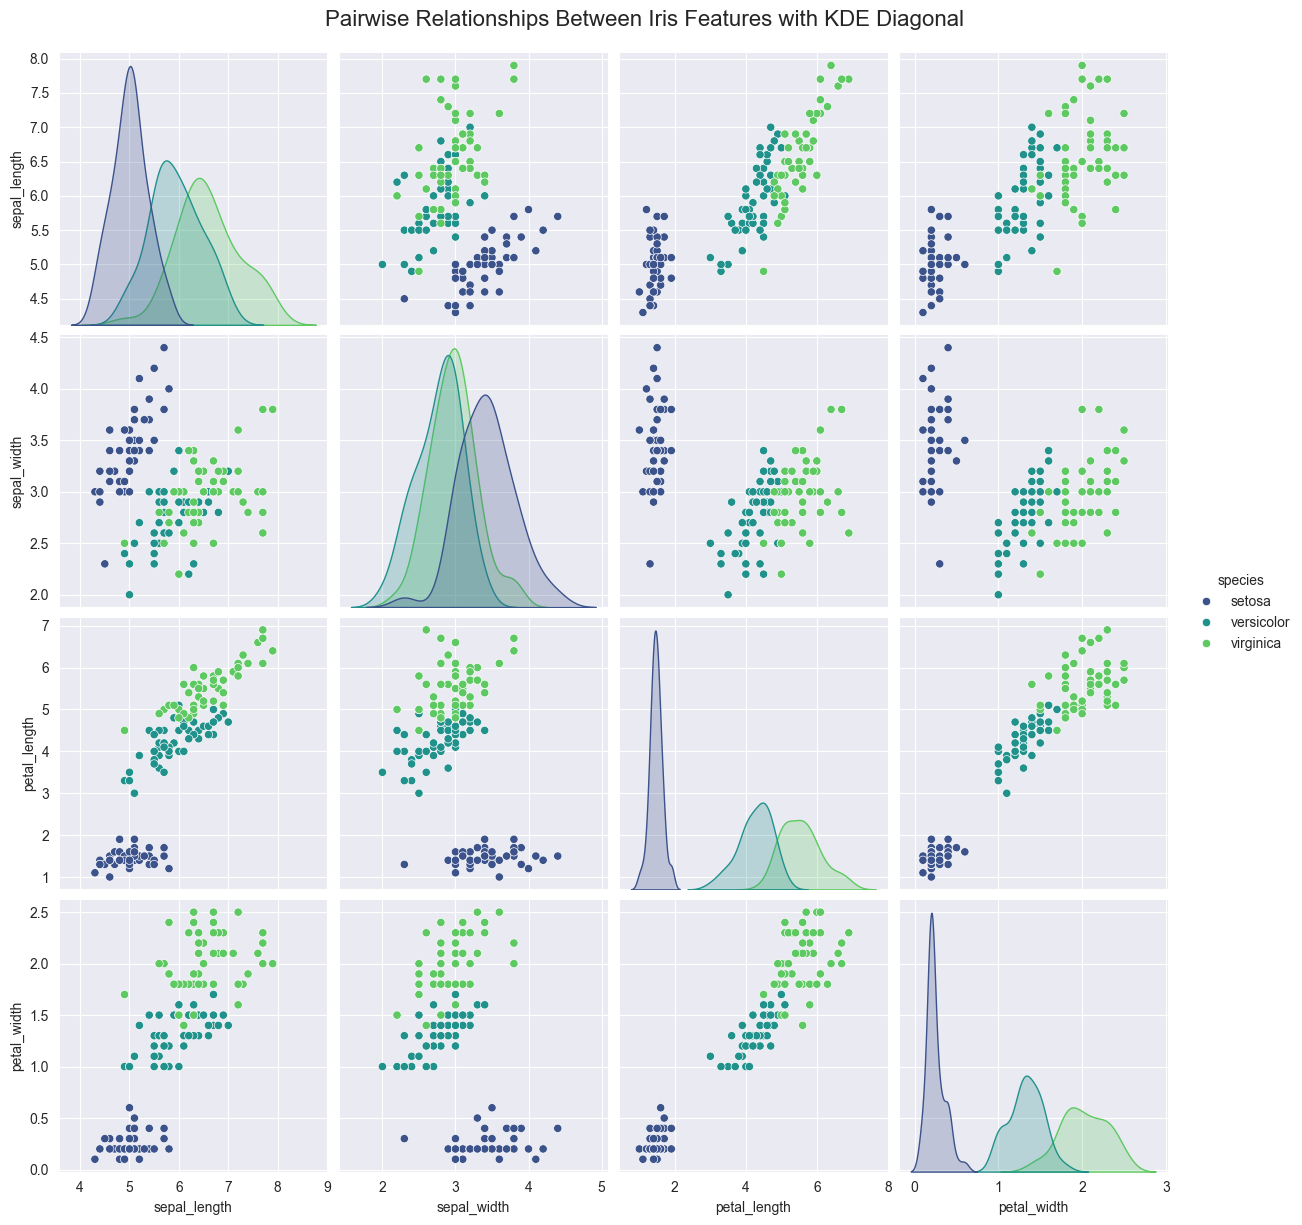

In [100]:
# Create a pairplot with KDEs on the diagonal
sns.pairplot(iris, hue="species", palette="viridis", diag_kind="kde", height=3)

# Add a title to the plot
plt.suptitle("Pairwise Relationships Between Iris Features with KDE Diagonal", y=1.02, fontsize=16)

# Show the plot
plt.show()

What plots are now on the diagonal? Does it seem more informative now?

<font color='red'> YOUR ANSWER HERE </font>

Diagonal Plots:
Now, the diagonal plots display Kernel Density Estimates (KDEs) for each feature (petal length, petal width, sepal length, sepal width) instead of histograms.
Is it More Informative?
Yes, the KDE plots are more smooth and give a clearer view of the distribution shape (e.g., multimodal distributions) compared to histograms.
They allow us to better visualize the overall distribution of each feature and how the species differ in terms of their distributions.